# **Maximum Likelihood Estimation, the main idea**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

## Flipping a coin experement

In [ ]:
import numpy as np
import math


def coin_flipping(n,p_H):         #we flip a coin n times, and the P(head)=p_H.
                                  # this function simulates this experement,
                                  # and returns back the observations
  observations = np.random.choice([0, 1], size=n, p=[1-p_H, p_H])
  return (np.sum(observations))
  

def nCr(n,k):                    #this is k-permutations of n
    f = math.factorial
    return f(n) // f(k) // f(n-k)

In [ ]:
total_num=10000
num_heads=coin_flipping(total_num,0.2)
print(num_heads)



1954


## Maximum Likelihood Estimation

Text(0.5,1,'Maximum Likelihood Estimation')

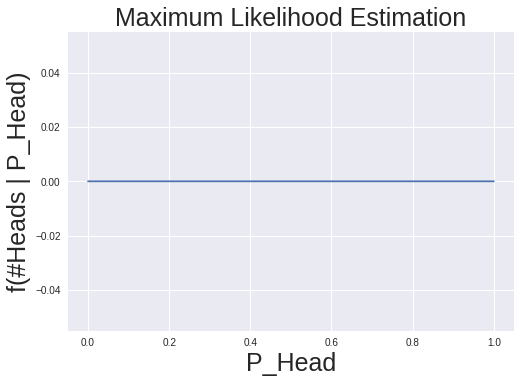

In [ ]:
import matplotlib.pyplot as plt



p_Head=np.linspace(0,1,10000)

likelihood=p_Head**num_heads*(1-p_Head)**(total_num-num_heads) #we are calculating P(num_heads|P_Head) for different P_Head values (no nCr(total_num,num_heads) term, we assume observations are ordered. Either way nCr(total_num,num_heads) is indipendent of p_head and has no effect on MLE)

plt.plot(p_Head,likelihood)

plt.xlabel("P_Head", fontsize=25)
plt.ylabel("f(#Heads | P_Head)", fontsize=25)
plt.title('Maximum Likelihood Estimation', fontsize=25)

## Log Maximum Likelihood Estimation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0.5,1,'Maximum Likelihood Estimation')

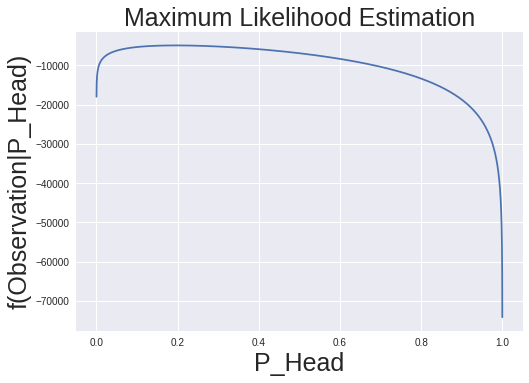

In [ ]:
import matplotlib.pyplot as plt


p_Head=np.linspace(0,1,10000)
likelihood=(num_heads)*np.log(p_Head)+(total_num-num_heads)*np.log(1-p_Head)
plt.plot(p_Head,likelihood)
plt.xlabel("P_Head", fontsize=25)
plt.ylabel("f(Observation|P_Head)", fontsize=25)
plt.title('Maximum Likelihood Estimation', fontsize=25)

In [ ]:
import matplotlib.pyplot as plt


p_Head=np.linspace(0,1,10000)
likelihood=(num_heads)*np.log(p_Head)+(total_num-num_heads)*np.log(1-p_Head) #we got rid of np.log(float(nCr(total_num,num_heads))) because it it indipendent 
                                                                             #of P_Head.
plt.plot(p_Head,likelihood)
plt.xlabel("P_Head", fontsize=25)
plt.ylabel("f(Observation|P_Head)", fontsize=25)
plt.title('Maximum Likelihood Estimation', fontsize=25)

## Drawing numbers from a normal distribution with variance 1 but unknown mean

In [ ]:
def draw_from_normal_dist(n,mu):        
  observations = np.random.normal(loc=mu, scale=1.0, size=n)
  return (observations)

In [ ]:
total_num=100

Data=draw_from_normal_dist(total_num,-0.6)


In [ ]:
import scipy

num_mean=100
mean=np.linspace(-1,1,num_mean)
likelihood=np.zeros(num_mean)
for i in range(num_mean):
  likelihood[i]=np.prod(scipy.stats.norm(mean[i], 1).pdf(Data))
  
plt.plot(mean,likelihood)


In [ ]:
import scipy

num_mean=100
mean=np.linspace(-1,1,num_mean)
likelihood=np.zeros(num_mean)
for i in range(num_mean):
  likelihood[i]=np.prod(np.sum(scipy.stats.norm(mean[i], 1).pdf(Data)))
  
plt.plot(mean,likelihood)